As a part of our analysis we will start with some baseline classical machine learning models such as `Linear Regression`, `Random Forest`, `XGBoost` and `Multivariate Baseline Model`.

In [10]:
# Importing Necessary Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [11]:
# Load training data
X_train_apple = pd.read_csv("../data/tt_splits/X_train_apple.csv")
X_train_nvidia = pd.read_csv("../data/tt_splits/X_train_nvidia.csv")
X_train_microsoft = pd.read_csv("../data/tt_splits/X_train_microsoft.csv")

y_train_apple = pd.read_csv("../data/tt_splits/y_train_apple.csv")
y_train_nvidia = pd.read_csv("../data/tt_splits/y_train_nvidia.csv")
y_train_microsoft = pd.read_csv("../data/tt_splits/y_train_microsoft.csv")

# Load test data
X_test_apple = pd.read_csv("../data/tt_splits/X_test_apple.csv")
X_test_nvidia = pd.read_csv("../data/tt_splits/X_test_nvidia.csv")
X_test_microsoft = pd.read_csv("../data/tt_splits/X_test_microsoft.csv")

y_test_apple = pd.read_csv("../data/tt_splits/y_test_apple.csv")
y_test_nvidia = pd.read_csv("../data/tt_splits/y_test_nvidia.csv")
y_test_microsoft = pd.read_csv("../data/tt_splits/y_test_microsoft.csv")

In [12]:
# Ensure y values are properly formatted (flattening in case they are single-column dataframes)

y_train_apple = y_train_apple.values.ravel()
y_train_nvidia = y_train_nvidia.values.ravel()
y_train_microsoft = y_train_microsoft.values.ravel()

y_test_apple = y_test_apple.values.ravel()
y_test_nvidia = y_test_nvidia.values.ravel()
y_test_microsoft = y_test_microsoft.values.ravel()

In [13]:
# Initialize Models

models = {
    'Apple': LinearRegression(),
    'NVIDIA': LinearRegression(),
    'Microsoft': LinearRegression()
}

# Training Models

models['Apple'].fit(X_train_apple, y_train_apple)
models['NVIDIA'].fit(X_train_nvidia, y_train_nvidia)
models['Microsoft'].fit(X_train_microsoft, y_train_microsoft)

LinearRegression()

In [14]:
# Predictions

preds_apple = models['Apple'].predict(X_test_apple)
preds_nvidia = models['NVIDIA'].predict(X_test_nvidia)
preds_microsoft = models['Microsoft'].predict(X_test_microsoft)

In [15]:
# Evaluation Metrics

metrics = {
    stock: {
        "MSE": mean_squared_error(y_test, preds),
        "RMSE": np.sqrt(mean_squared_error(y_test, preds)),
        "MAE": mean_absolute_error(y_test, preds),
        "R2 Score": r2_score(y_test, preds),
    }
    for stock, preds, y_test in zip(
        ["Apple","NVIDIA","Microsoft"],
        [preds_apple, preds_nvidia, preds_microsoft],
        [y_test_apple,y_test_nvidia,y_test_microsoft]
    )
}        

In [16]:
# Convert Metrics Dictionary to Dataframe

metrics_df = pd.DataFrame(metrics).T
metrics_df

,MSE,RMSE,MAE,R2 Score
Apple,0.002463,0.049625,0.037149,-0.731491
NVIDIA,0.022009,0.148355,0.099727,-3.271615
Microsoft,0.005726,0.075667,0.060018,-4.073438


**MSE:**
- `NVIDIA` has the highest MSE, meaning its stock price movements are harder to predict using Linear Regression.

**MAE:**
- Again `NVIDIA` shows the highest error, suggesting high volatility or nonlinear patterns that Linear regression cannot capture.

**R Square Score:**
- All values are negative, meaning Linear Regression is performing worse than a naive mean-based model.

This basically means that the model fails to capture stock price trends effectively.


**Key Takeaways:**

1. Linear Regression is not a suitable model for stock price prediction.
- Stocks exhibit nonlinear patterns that this model cannot capture.
- The negative R2 scores confirm that even a simple moving average might outperform this approach.

2. NVIDIA's stock prices are harder to predict than Apple and microsoft.
- It has the highest RMSE and worst R² score.
- This suggests higher volatility or stronger nonlinear movements.

Let's now visualize the predictions vs actual prices to better understand where the model fails.

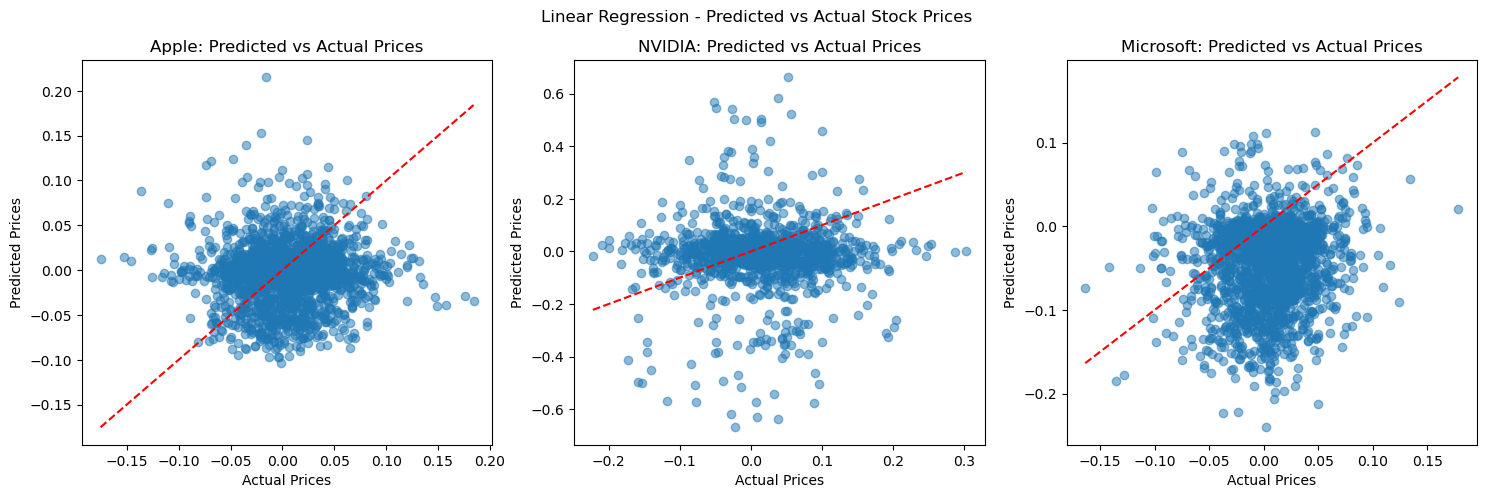

In [17]:
# Plot Predicted vs Actual Prices for each stock

fig, axes = plt.subplots(1,3,figsize=(18,5))

stocks = ['Apple','NVIDIA','Microsoft']
predictions = [preds_apple, preds_nvidia, preds_microsoft]
actuals = [y_test_apple, y_test_nvidia, y_test_microsoft]

for i, (stock, preds, y_test) in enumerate(zip(stocks, predictions, actuals)):
    axes[i].scatter(y_test, preds, alpha=0.5)
    axes[i].plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='dashed')  # Perfect Fit Line
    axes[i].set_xlabel("Actual Prices")
    axes[i].set_ylabel("Predicted Prices")
    axes[i].set_title(f"{stock}: Predicted vs Actual Prices")

plt.suptitle("Linear Regression - Predicted vs Actual Stock Prices")
plt.show()

**Apple Stock:** 
- Predictions are widely dispersed around the red line.
- No clear trend, meaning Linear Regression is struggling to capture stock price movements.
- Predictions cluster around 0, showing that the model often predicts close to the mean instead of actual fluctuations.

**NVIDIA Stock:**
- The worst-performing model (from the metrics we saw earlier).
- Extreme spread of predicted values, with some highly inaccurate predictions (some outliers above 0.6 or below -0.4).
- Indicates high volatility that Linear Regression cannot handle.

**Microsoft Stock:**
- Slightly better than NVIDIA, but still shows random spread.
- Most predictions stay near zero, meaning the model is overly conservative and failing to predict meaningful price changes.

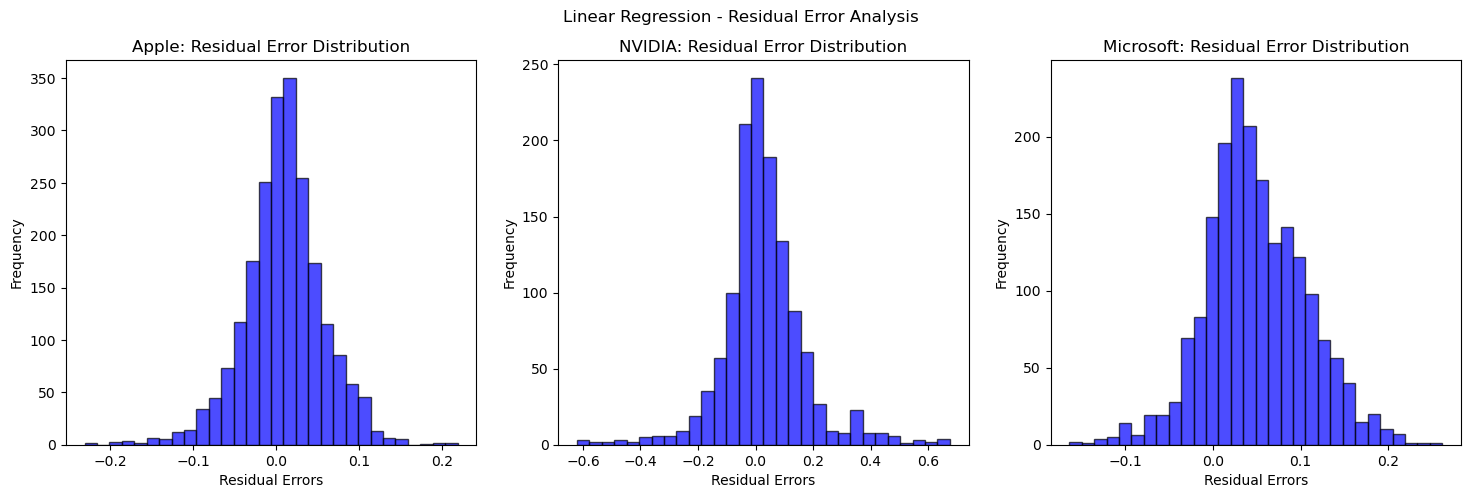

In [18]:
# Plot Residual Errors
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i, (stock, preds, y_test) in enumerate(zip(stocks, predictions, actuals)):
    residuals = y_test - preds
    axes[i].hist(residuals, bins=30, alpha=0.7, color='blue', edgecolor='black')
    axes[i].set_xlabel("Residual Errors")
    axes[i].set_ylabel("Frequency")
    axes[i].set_title(f"{stock}: Residual Error Distribution")

plt.suptitle("Linear Regression - Residual Error Analysis")
plt.show()

Apple: The residuals are centered around zero, showing a normal-like distribution, suggesting minimal bias. The errors are relatively small, indicating a good fit.

NVIDIA: The distribution is also centered around zero, but with a wider spread, suggesting that the model has higher variance in errors, meaning it struggles more with NVIDIA’s volatile stock movements.

Microsoft: The residuals follow a normal-like distribution and are similar to Apple’s, showing smaller errors and indicating that the model captures trends reasonably well.

### Why is Linear Regression Failing ?

- **Stock prices are highly nonlinear:** 
Linear Regression assumes a simple linear relationship, which does not hold for financial markets.

- **No feature interactions captured:**
Stocks are influenced by multiple correlated factors that this model doesn’t capture well.

- **High volatility in stock prices:**
The model fails to adapt to large fluctuations.